### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "oct_scan_end_of_levelling"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  qx     qy     i_oct_b1 i_oct_b2                      
lhcb1 62.305 60.310 -600.0   -600.0        base_collider   
                    -550.0   -550.0        base_collider   
                    -500.0   -500.0        base_collider   
                    -450.0   -450.0        base_collider   
                    -400.0   -400.0        base_collider   
...                                                  ...   
      62.329 60.334  400.0    400.0        base_collider   
                     450.0    450.0        base_collider   
                     500.0    500.0        base_collider   
                     550.0    550.0        base_collider   
                     600.0    600.0        base_collider   

                                       normalized amplitude in xy-plane  \
beam  qx     qy     i_oct_b1 i_oct_b2                                     
lhcb1 62.305 60.310 -600.0   -600.0                               4.750   
                    -550.0   -550.0                               4.219   
                    -500.0   -500.0                               4.281   
                    -450.0   -450.0                               4.125   
                    -400.0   -400.0                               4.125   
...                                                                 ...   
      62.329 60.334  400.0    400.0                               4.000   
                     450.0    450.0                               4.000   
                     500.0    500.0                               4.000   
                     550.0    550.0                               4.000   
                     600.0    600.0                               4.000   

                                           qx      qy   dqx   dqy  i_bunch_b1  \
beam  qx     qy     i_oct_b1 i_oct_b2                                           
lhcb1 62.305 60.310 -600.0   -600.0    62.305  60.310  15.0  15.0       150.0   
                    -550.0   -550.0    62.305  60.310  15.0  15.0       150.0   
                    -500.0   -500.0    62.305  60.310  15.0  15.0       150.0   
                    -450.0   -450.0    62.305  60.310  15.0  15.0       150.0   
                    -400.0   -400.0    62.305  60.310  15.0  15.0       150.0   
...                                       ...     ...   ...   ...         ...   
      62.329 60.334  400.0    400.0    62.329  60.334  15.0  15.0       150.0   
                     450.0    450.0    62.329  60.334  15.0  15.0       150.0   
                     500.0    500.0    62.329  60.334  15.0  15.0       150.0   
                     550.0    550.0    62.329  60.334  15.0  15.0       150.0   
                     600.0    600.0    62.329  60.334  15.0  15.0       150.0   

                                       i_bunch_b2  i_oct_b1  i_oct_b2  \
beam  qx     qy     i_oct_b1 i_oct_b2                                   
lhcb1 62.305 60.310 -600.0   -600.0         147.0    -600.0    -600.0   
                    -550.0   -550.0         147.0    -550.0    -550.0   
                    -500.0   -500.0         147.0    -500.0    -500.0   
                    -450.0   -450.0         147.0    -450.0    -450.0   
                    -400.0   -400.0         147.0    -400.0    -400.0   
...                                           ...       ...       ...   
      62.329 60.334  400.0    400.0         147.0     400.0     400.0   
                     450.0    450.0         147.0     450.0     450.0   
                     500.0    500.0         147.0     500.0     500.0   
                     550.0    550.0         147.0     550.0     550.0   
                     600.0    600.0         147.0     600.0     600.0   

                                       num_particles_per_bunch  crossing_angle  
beam  qx     qy     i_oct_b1 i_oct_b2                                           
lhcb1 62.305 60.310 -600.0   -600.0               2.200000e+11           250.0  
                    -550.0   -550.

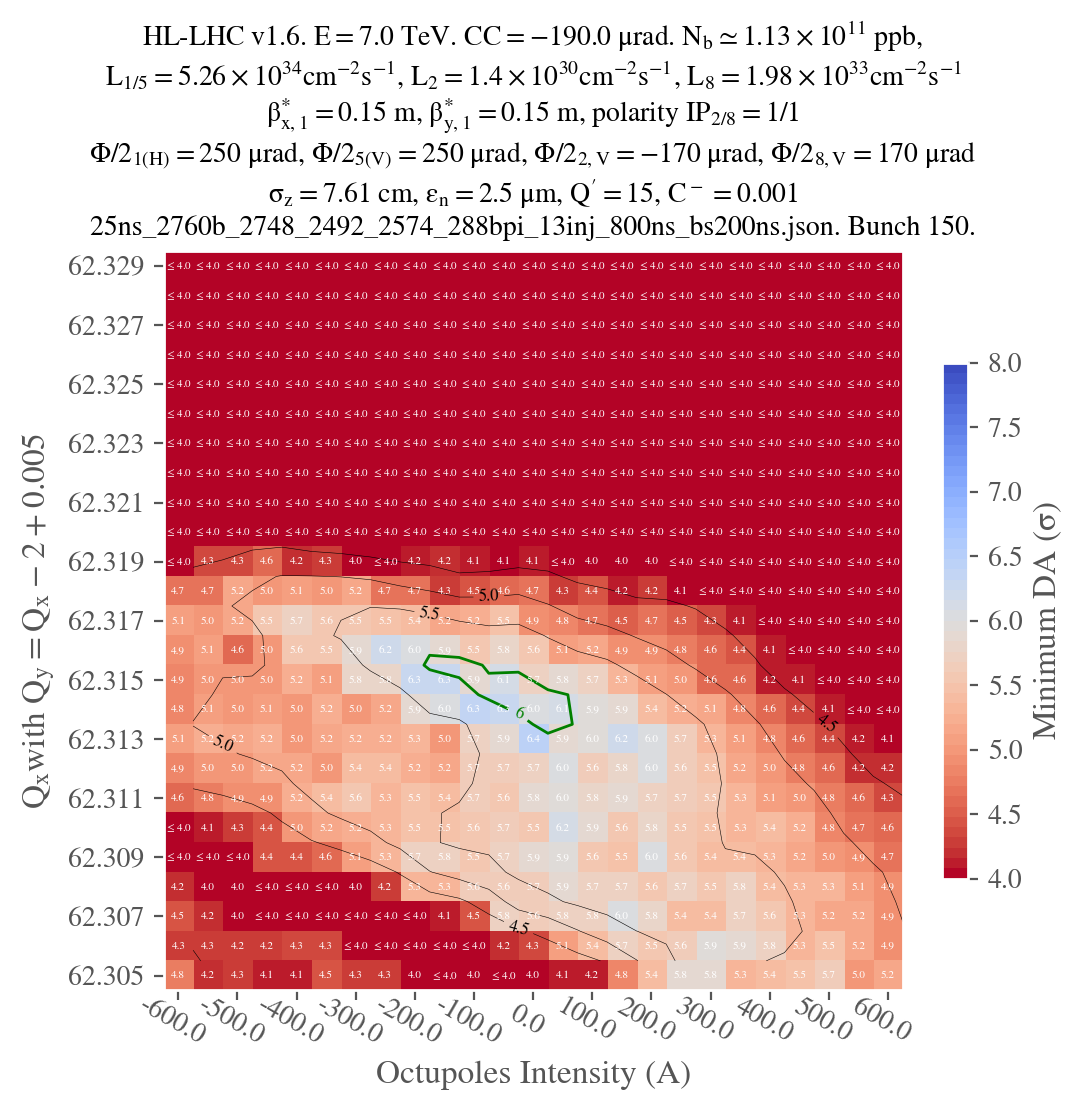

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="qx", columns="i_oct_b1", values="normalized amplitude in xy-plane")

l_oct = np.linspace(-600,600,25)
df_to_plot.columns = [str(oct) for oct in l_oct]

# replace nan in df by 10
df_to_plot = df_to_plot.fillna(10)


# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

xlabel = "Octupoles Intensity (A)"
ylabel = r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$"
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx = 0.15,
    bety = 0.15,
    type_crossing="flathv",
    symmetric=False,
    mask_lower_triangle=False,
    xlabel=xlabel,
    ylabel=ylabel,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=False,
    green_contour=6.,
    CC = True,
    vmin=4.,
    vmax=8.0,
    extended_diagonal=False,
    Nb=True,
    #title="opt_collapse_1100_1500_oct_scan",
)